In [1]:
#Data manipulation and preprocessing 
import pandas as pd
import numpy as np
#Data exploration
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
#Data balancing
from imblearn.over_sampling import SMOTE
#Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from catboost import CatBoostClassifier

#Model Evaluation
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report,accuracy_score,roc_curve
import warnings
warnings.filterwarnings("ignore")

### Data preprocessing

In [2]:
data = pd.read_csv("urinalysis_tests.csv")#importing the dataset
data.drop(columns = "Unnamed: 0", axis = 1,inplace = True)#removing the unnamed column
data.head()

,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,76.0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.010,1-3,0-2,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,NEGATIVE
1,9.0,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.030,1-3,0-2,RARE,FEW,FEW,MODERATE,NEGATIVE
2,12.0,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.030,0-3,0-2,RARE,FEW,MODERATE,RARE,NEGATIVE
3,77.0,MALE,BROWN,CLOUDY,NEGATIVE,1+,6.0,1.020,5-8,LOADED,RARE,RARE,NONE SEEN,FEW,NEGATIVE
4,29.0,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,6.0,1.025,1-4,0-2,RARE,RARE,NONE SEEN,FEW,NEGATIVE


In [3]:
data_copy = data.copy()


In [4]:
#replace categorical data with an ordinal format
data_copy['Transparency'] = data_copy['Transparency'].replace({'CLEAR': 1, 'SLIGHTLY HAZY': 2, 
                                                               'HAZY': 3, 'CLOUDY': 4, 'TURBID': 5})
data_copy['Glucose'] =data_copy['Glucose'].replace({'NEGATIVE': 1, 'TRACE': 2, '1+': 3,
                                       '2+': 4, '3+': 5, '4+': 6})
data_copy['Protein'] = data_copy['Protein'].replace({'NEGATIVE': 1, 'TRACE': 2, '1+': 3,
                                       '2+': 4, '3+': 5})
data_copy['Epithelial Cells'] = data_copy['Epithelial Cells'].replace({'NONE SEEN': 1, 'RARE': 2, 'OCCASIONAL': 3,
                                                         'FEW': 4, 'MODERATE': 5, 'PLENTY': 6, 'LOADED': 7})
data_copy['Mucous Threads'] = data_copy['Mucous Threads'].replace({'NONE SEEN': 1, 'RARE': 2, 'OCCASIONAL': 3,
                                                     'FEW': 4, 'MODERATE': 5, 'PLENTY': 6})
data_copy['Amorphous Urates'] =data_copy['Amorphous Urates'].replace({'NONE SEEN': 1, 'RARE': 2, 'OCCASIONAL': 3,
                                                         'FEW': 4, 'MODERATE': 5, 'PLENTY': 6, 'LOADED': 7})
data_copy['Bacteria'] = data_copy['Bacteria'].replace({'NONE SEEN': 1, 'RARE': 2, 'OCCASIONAL': 3, 'FEW': 4,
                                         'MODERATE': 5, 'PLENTY': 6, 'LOADED': 7})

In [6]:
data_copy['Diagnosis'].replace({'NEGATIVE':0,'POSITIVE':1},inplace = True)

In [28]:
wbc_order = [
    '0-1', '0-2', '0-3', '0-4', '1-2', '1-3', '1-4', '1-5', '2-3', '2-4', '2-5', '2-7', 
    '3-4', '3-5', '3-6', '3-7', '3-10', '4-5', '4-6', '4-7', '4-8', '4-10', '5-6', '5-7', 
    '5-8', '5-10', '6-8', '7-8', '7-9', '7-10', '7-15', '8-10', '8-11', '8-12', '9-11', 
    '9-12', '9-15', '10-12', '10-15', '10-16', '10-18', '11-14', '11-15', '12-14', 
    '12-15', '12-17', '13-15', '14-16', '15-17', '15-18','16-18', '15-20', '15-21', '15-22', 
    '15-28', '17-20', '18-20', '18-21', '18-22', '18-25', '20-22', '20-25', '23-25', 
    '25-30', '25-32', '28-30', '28-35', '30-32', '30-35', '34-36', '35-40', '45-50', 
    '48-55', '50-55', '55-58', '70-75', '79-85', '>50', '>100', 'LOADED','TNTC']
rbc_order = [
    '0-0', '0-1', '1-2', '1-3', '1-4', '1-5', '1-6', '2-3', '2-4', '2-5', '2-6', '3-4', 
    '3-5', '3-6', '4-6', '4-8', '4-10', '5-7', '5-8', '5-10', '5-12', '6-8', '6-14', 
    '8-10', '8-12', '9-11', '9-12', '10-12', '10-15', '11-13', '12-15', '12-17', '13-15', 
    '15-17', '18-20', '18-21', '18-22', '20-22', '20-25', '22-24', '23-25', '25-30', 
    '25-32', '28-30', '30-35', '30-40', '36-38', '38-40', '>50','48-62','85-87', '>100', 'TNTC']

# Replace values in the 'WBC' column with their ordinal number
data_copy['WBC'] = data_copy['WBC'].replace({val: i+1 for i, val in enumerate(wbc_order)})
# Replace values in the 'RBC' column with their ordinal number
data_copy['RBC'] = data_copy['RBC'].replace({val: i+1 for i, val in enumerate(wbc_order)})

In [29]:
data_copy.head()

,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,76.0,FEMALE,LIGHT YELLOW,1,1,1,5.0,1.010,6,2,3,2,1,3,0
1,9.0,MALE,DARK YELLOW,2,1,3,5.0,1.030,6,2,2,4,4,5,0
2,12.0,MALE,LIGHT YELLOW,2,1,2,5.0,1.030,3,2,2,4,5,2,0
3,77.0,MALE,BROWN,4,1,3,6.0,1.020,25,79,2,2,1,4,0
4,29.0,FEMALE,YELLOW,3,1,2,6.0,1.025,7,2,2,2,1,4,0


In [30]:
set(data_copy['RBC'].values)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 50,
 51,
 59,
 79}

In [33]:
data_copy= pd.get_dummies(data_copy, columns=['Gender', 'Color'])

In [34]:
data_copy.head()

,Age,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,...,Color_AMBER,Color_BROWN,Color_DARK YELLOW,Color_LIGHT RED,Color_LIGHT YELLOW,Color_RED,Color_REDDISH,Color_REDDISH YELLOW,Color_STRAW,Color_YELLOW
0,76.0,1,1,1,5.0,1.010,6,2,3,2,...,False,False,False,False,True,False,False,False,False,False
1,9.0,2,1,3,5.0,1.030,6,2,2,4,...,False,False,True,False,False,False,False,False,False,False
2,12.0,2,1,2,5.0,1.030,3,2,2,4,...,False,False,False,False,True,False,False,False,False,False
3,77.0,4,1,3,6.0,1.020,25,79,2,2,...,False,True,False,False,False,False,False,False,False,False
4,29.0,3,1,2,6.0,1.025,7,2,2,2,...,False,False,False,False,False,False,False,False,False,True


In [9]:
data.columns

Index(['Age', 'Gender', 'Color', 'Transparency', 'Glucose', 'Protein', 'pH',
       'Specific Gravity', 'WBC', 'RBC', 'Epithelial Cells', 'Mucous Threads',
       'Amorphous Urates', 'Bacteria', 'Diagnosis'],
      dtype='object')

In [35]:
x = data_copy.drop('Diagnosis',axis = 1)
y = data_copy['Diagnosis']
x.tail()

,Age,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,...,Color_AMBER,Color_BROWN,Color_DARK YELLOW,Color_LIGHT RED,Color_LIGHT YELLOW,Color_RED,Color_REDDISH,Color_REDDISH YELLOW,Color_STRAW,Color_YELLOW
1431,0.06,1,1,1,6.0,1.015,5,1,2,4,...,False,False,False,False,False,False,False,False,False,True
1432,42.00,1,1,1,6.5,1.010,2,2,2,1,...,False,False,False,False,False,False,False,False,False,True
1433,47.00,1,1,2,6.0,1.030,10,2,5,5,...,False,False,True,False,False,False,False,False,False,False
1434,57.00,1,1,2,5.0,1.030,2,2,6,6,...,False,False,True,False,False,False,False,False,False,False
1435,3.00,1,1,1,6.0,1.020,1,2,2,2,...,False,False,False,False,False,False,False,False,False,True


In [107]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 40)
print(len(x_train))
print(len(x_test))

1005
431


In [108]:
class TrainImbModels:
    def __init__(self,model,x_train, y_train, x_test, y_test):
        self.model = model
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.predictions = None
    def imb_model(self):#function for training models
        self.model.fit(self.x_train,self.y_train)
        self.predictions = self.model.predict(x_test)
        return print(classification_report(self.y_test,self.predictions))
    def plot_cm(self,model_name): #function for plotting confusion matrix
        cm = confusion_matrix(self.y_test,self.predictions)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
        disp.plot()
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()
    def plot_roc(self,model_name):
        plt.plot(roc_curve(self.y_test,self.predictions))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {model_name}')

In [109]:
k_nn = TrainImbModels(KNeighborsClassifier(),x_train, y_train, x_test, y_test) #KNN
k_nn.imb_model()

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       413
           1       0.40      0.11      0.17        18

    accuracy                           0.96       431
   macro avg       0.68      0.55      0.58       431
weighted avg       0.94      0.96      0.94       431



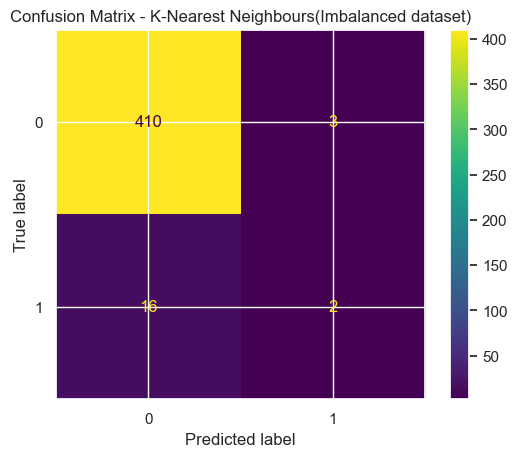

In [110]:
k_nn.plot_cm("K-Nearest Neighbours(Imbalanced dataset)")

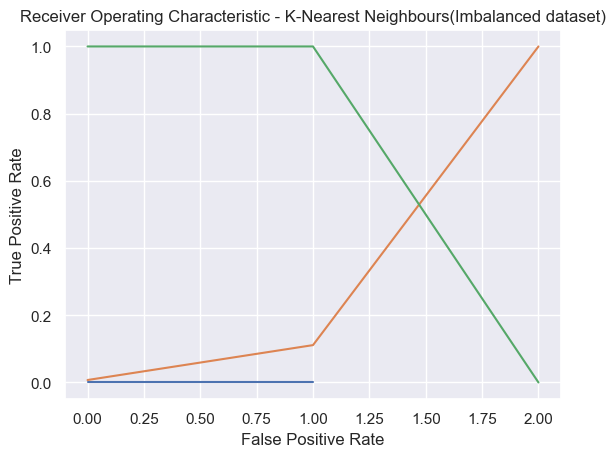

In [111]:
k_nn.plot_roc("K-Nearest Neighbours(Imbalanced dataset)")

In [112]:
rand_for = TrainImbModels(RandomForestClassifier(),x_train, y_train, x_test, y_test)#Random forest
rand_for.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       413
           1       0.70      0.39      0.50        18

    accuracy                           0.97       431
   macro avg       0.84      0.69      0.74       431
weighted avg       0.96      0.97      0.96       431



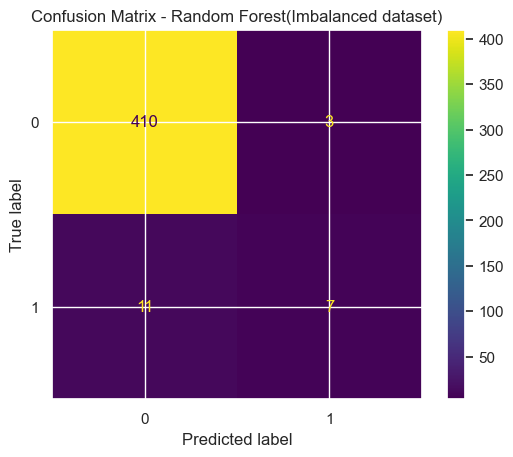

In [113]:
rand_for.plot_cm("Random Forest(Imbalanced dataset)")

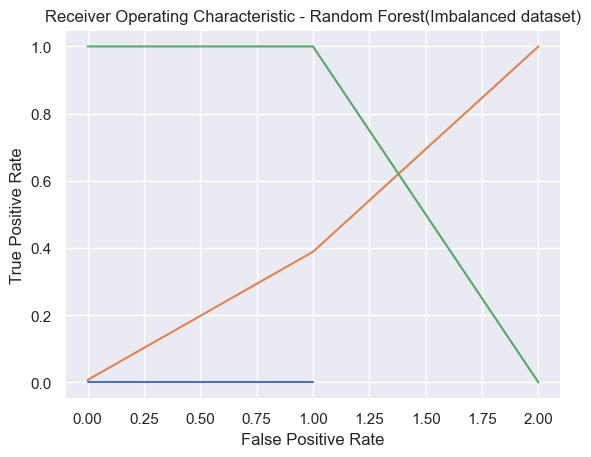

In [114]:
rand_for.plot_roc("Random Forest(Imbalanced dataset)")

In [115]:
log_reg = TrainImbModels(LogisticRegression(),x_train, y_train, x_test, y_test) #Logistic Regression
log_reg.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       413
           1       0.62      0.28      0.38        18

    accuracy                           0.96       431
   macro avg       0.80      0.64      0.68       431
weighted avg       0.95      0.96      0.96       431



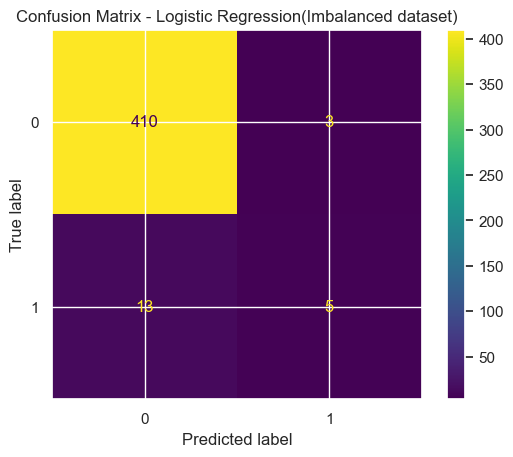

In [116]:
log_reg.plot_cm("Logistic Regression(Imbalanced dataset)")

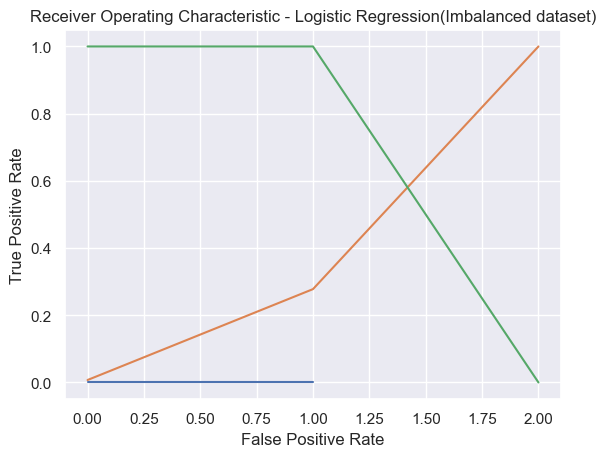

In [117]:
log_reg.plot_roc("Logistic Regression(Imbalanced dataset)")

In [118]:
ada = TrainImbModels(AdaBoostClassifier(),x_train, y_train, x_test, y_test) #Adaptive boosting
ada.imb_model()

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       413
           1       0.38      0.17      0.23        18

    accuracy                           0.95       431
   macro avg       0.67      0.58      0.60       431
weighted avg       0.94      0.95      0.94       431



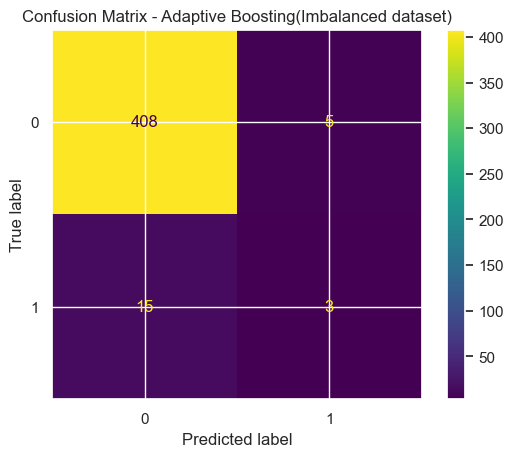

In [119]:
ada.plot_cm("Adaptive Boosting(Imbalanced dataset)")

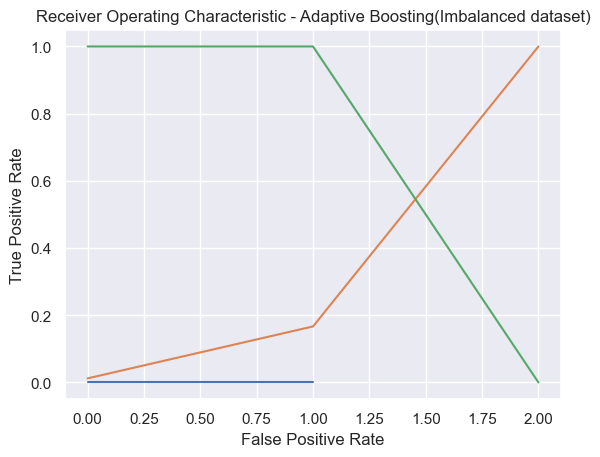

In [120]:
ada.plot_roc("Adaptive Boosting(Imbalanced dataset)")

In [121]:
DT = TrainImbModels(DecisionTreeClassifier(),x_train, y_train, x_test, y_test) #Decision Tree
DT.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       413
           1       0.38      0.33      0.35        18

    accuracy                           0.95       431
   macro avg       0.67      0.65      0.66       431
weighted avg       0.95      0.95      0.95       431



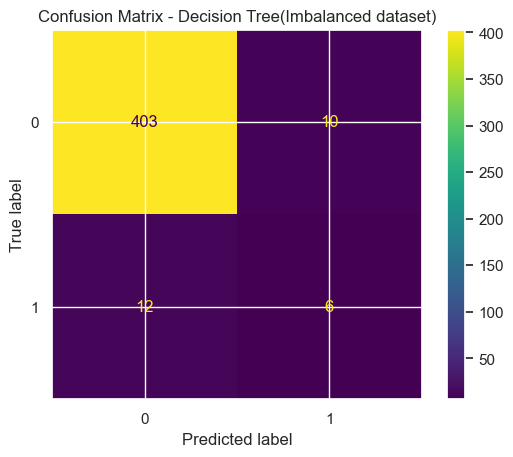

In [122]:
DT.plot_cm("Decision Tree(Imbalanced dataset)")

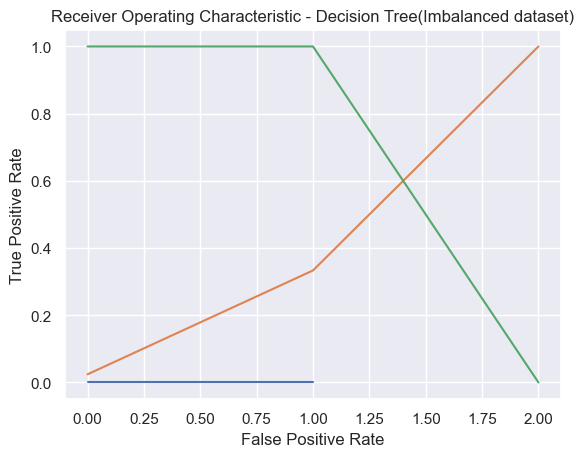

In [123]:
DT.plot_roc("Decision Tree(Imbalanced dataset)")

In [124]:
naive_bayes = TrainImbModels(BernoulliNB(),x_train, y_train, x_test, y_test)
naive_bayes.imb_model()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       413
           1       0.00      0.00      0.00        18

    accuracy                           0.96       431
   macro avg       0.48      0.50      0.49       431
weighted avg       0.92      0.96      0.94       431



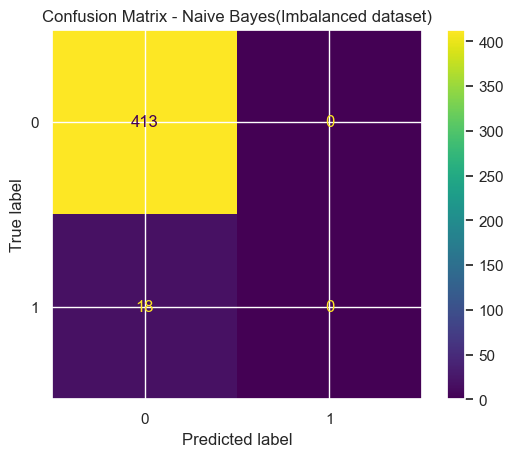

In [125]:
naive_bayes.plot_cm("Naive Bayes(Imbalanced dataset)")

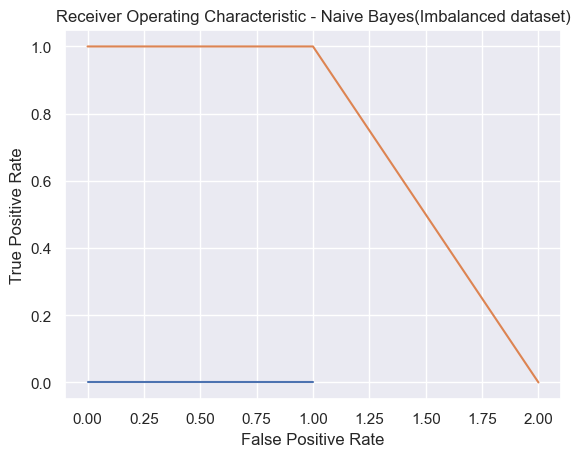

In [126]:
naive_bayes.plot_roc("Naive Bayes(Imbalanced dataset)")

In [127]:
svm = TrainImbModels(SVC(kernel = 'poly'),x_train, y_train, x_test, y_test)
svm.imb_model()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       413
           1       0.00      0.00      0.00        18

    accuracy                           0.96       431
   macro avg       0.48      0.50      0.49       431
weighted avg       0.92      0.96      0.94       431



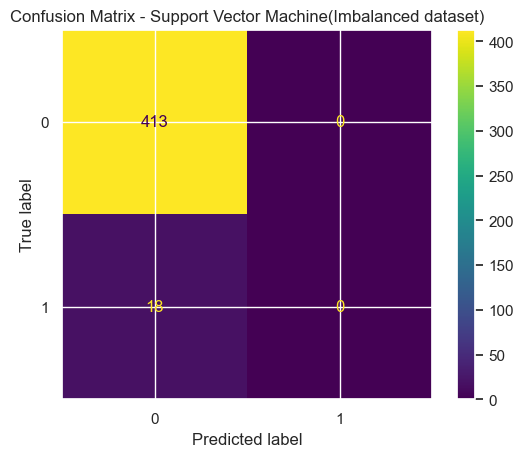

In [128]:
svm.plot_cm("Support Vector Machine(Imbalanced dataset)")

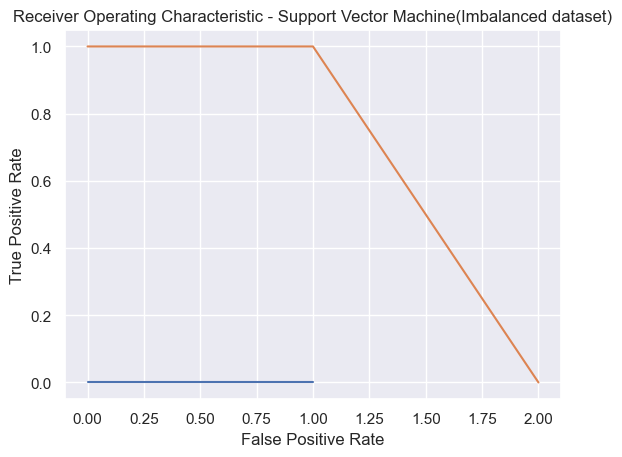

In [129]:
svm.plot_roc("Support Vector Machine(Imbalanced dataset)")

In [130]:
x.columns

Index(['Age', 'Transparency', 'Glucose', 'Protein', 'pH', 'Specific Gravity',
       'WBC', 'RBC', 'Epithelial Cells', 'Mucous Threads', 'Amorphous Urates',
       'Bacteria', 'Gender_FEMALE', 'Gender_MALE', 'Color_AMBER',
       'Color_BROWN', 'Color_DARK YELLOW', 'Color_LIGHT RED',
       'Color_LIGHT YELLOW', 'Color_RED', 'Color_REDDISH',
       'Color_REDDISH YELLOW', 'Color_STRAW', 'Color_YELLOW'],
      dtype='object')

In [131]:
cat_features = ['Gender_FEMALE', 
                'Gender_MALE', 'Color_AMBER','Color_BROWN', 'Color_DARK YELLOW', 
                'Color_LIGHT RED','Color_LIGHT YELLOW', 'Color_RED', 'Color_REDDISH',
                'Color_REDDISH YELLOW', 'Color_STRAW', 'Color_YELLOW'] #selecting the categorical variables in the dataset
cat = CatBoostClassifier(iterations=500, 
                           depth=6, 
                           learning_rate=0.1, 
                           loss_function='Logloss', 
                           verbose=True)
# Training the model
cat.fit(x_train, y_train, cat_features=cat_features, eval_set=(x_test, y_test), plot=True)

# Making predictions
cat_pred = cat.predict(x_test)
print(classification_report(y_test,cat_pred))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5452935	test: 0.5463327	best: 0.5463327 (0)	total: 14.9ms	remaining: 7.43s
1:	learn: 0.4359223	test: 0.4353079	best: 0.4353079 (1)	total: 25.5ms	remaining: 6.34s
2:	learn: 0.3780777	test: 0.3730428	best: 0.3730428 (2)	total: 35.3ms	remaining: 5.85s
3:	learn: 0.3141336	test: 0.3103656	best: 0.3103656 (3)	total: 45.4ms	remaining: 5.63s
4:	learn: 0.2740474	test: 0.2695415	best: 0.2695415 (4)	total: 55.5ms	remaining: 5.49s
5:	learn: 0.2373714	test: 0.2336347	best: 0.2336347 (5)	total: 66ms	remaining: 5.43s
6:	learn: 0.2222124	test: 0.2158975	best: 0.2158975 (6)	total: 74.1ms	remaining: 5.22s
7:	learn: 0.1990268	test: 0.1943653	best: 0.1943653 (7)	total: 84.2ms	remaining: 5.18s
8:	learn: 0.1771776	test: 0.1754945	best: 0.1754945 (8)	total: 95ms	remaining: 5.18s
9:	learn: 0.1647264	test: 0.1639002	best: 0.1639002 (9)	total: 105ms	remaining: 5.16s
10:	learn: 0.1530094	test: 0.1556882	best: 0.1556882 (10)	total: 115ms	remaining: 5.13s
11:	learn: 0.1499389	test: 0.1521678	best: 0.15

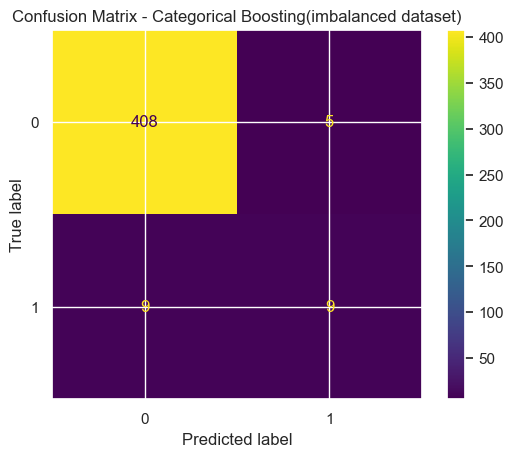

In [132]:
cm = confusion_matrix(y_test,cat_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.title('Confusion Matrix - Categorical Boosting(imbalanced dataset)')
plt.show()

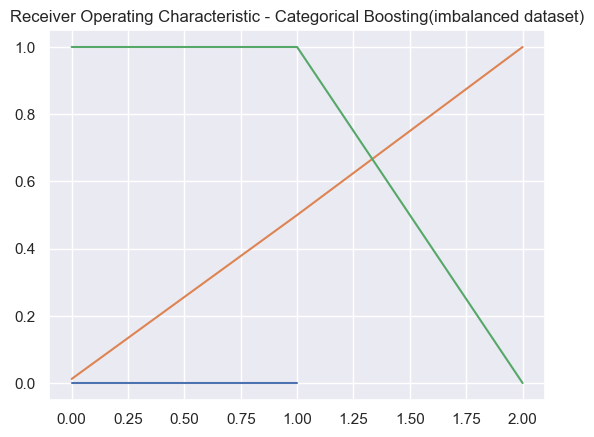

In [133]:
plt.plot(roc_curve(y_test,cat_pred))
plt.title('Receiver Operating Characteristic - Categorical Boosting(imbalanced dataset)')
plt.show()

### Data balancing

In [134]:
smote = SMOTE()
x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)

In [135]:
knn_bal = TrainImbModels(KNeighborsClassifier(),x_train_bal, y_train_bal, x_test, y_test) #KNN
knn_bal.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       413
           1       0.12      0.50      0.19        18

    accuracy                           0.82       431
   macro avg       0.55      0.67      0.54       431
weighted avg       0.94      0.82      0.87       431



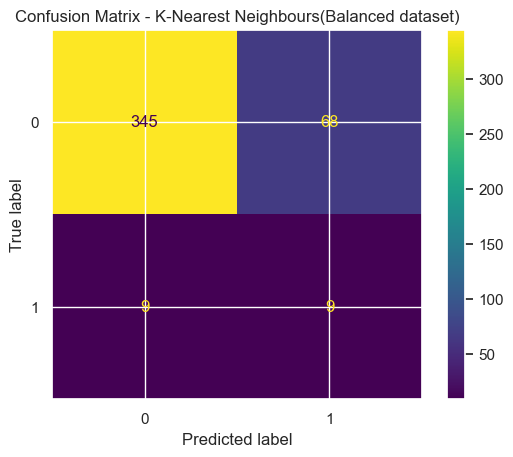

In [136]:
knn_bal.plot_cm("K-Nearest Neighbours(Balanced dataset)")

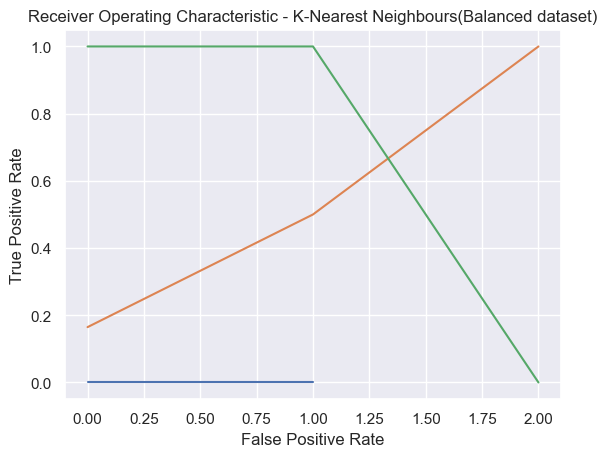

In [137]:
knn_bal.plot_roc("K-Nearest Neighbours(Balanced dataset)")

In [138]:
rand_for_bal = TrainImbModels(RandomForestClassifier(),x_train_bal, y_train_bal, x_test, y_test) #Random forest
rand_for_bal.imb_model()

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       413
           1       0.73      0.44      0.55        18

    accuracy                           0.97       431
   macro avg       0.85      0.72      0.77       431
weighted avg       0.97      0.97      0.97       431



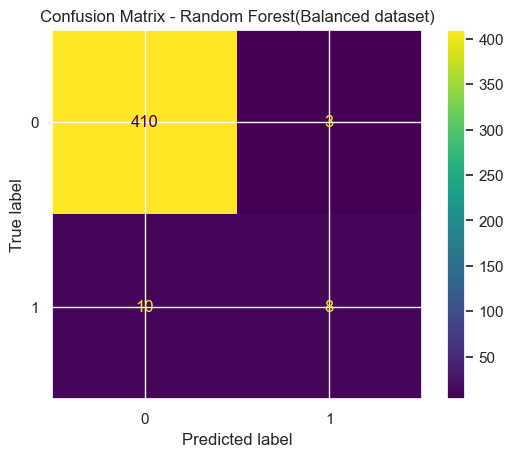

In [139]:
rand_for_bal.plot_cm("Random Forest(Balanced dataset)")

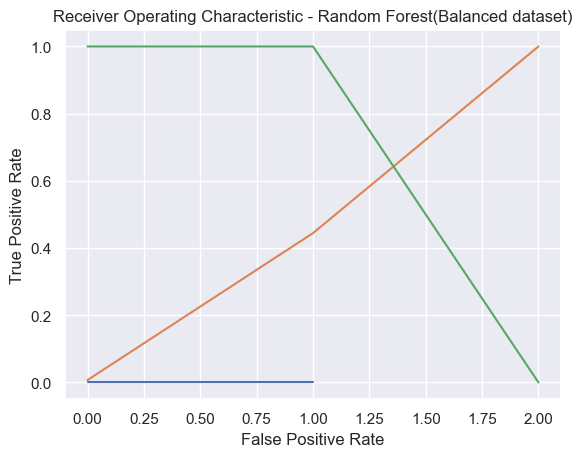

In [140]:
rand_for_bal.plot_roc("Random Forest(Balanced dataset)")

In [141]:
log_reg_bal = TrainImbModels(LogisticRegression(),x_train_bal, y_train_bal, x_test, y_test) #Logistic Regression
log_reg_bal.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       413
           1       0.16      0.33      0.21        18

    accuracy                           0.90       431
   macro avg       0.56      0.63      0.58       431
weighted avg       0.94      0.90      0.91       431



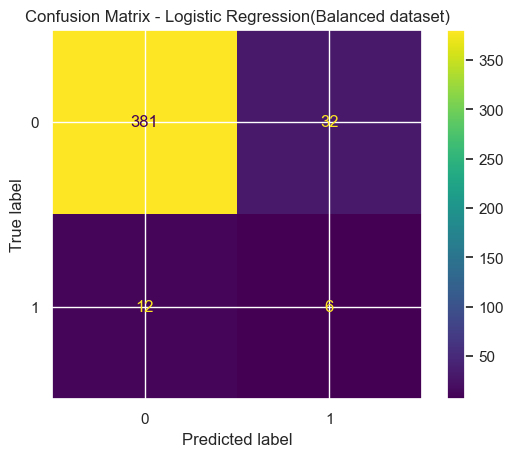

In [142]:
log_reg_bal.plot_cm("Logistic Regression(Balanced dataset)")

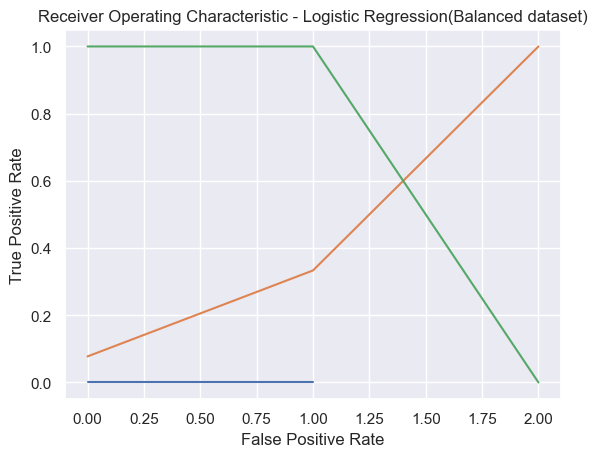

In [143]:
log_reg_bal.plot_roc("Logistic Regression(Balanced dataset)")

In [144]:
ada_bal = TrainImbModels(AdaBoostClassifier(),x_train_bal, y_train_bal, x_test, y_test) #Adaptive boosting
ada_bal.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       413
           1       0.28      0.39      0.33        18

    accuracy                           0.93       431
   macro avg       0.63      0.67      0.65       431
weighted avg       0.94      0.93      0.94       431



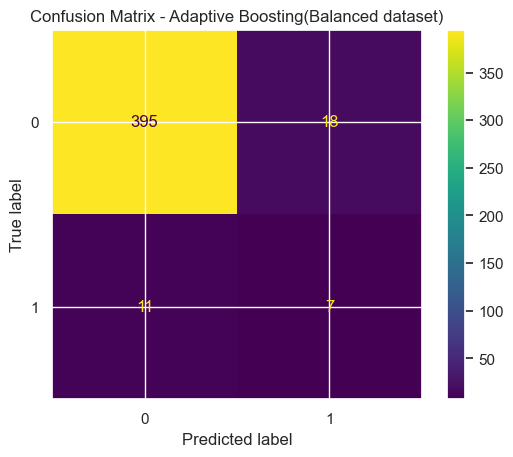

In [145]:
ada_bal.plot_cm("Adaptive Boosting(Balanced dataset)")

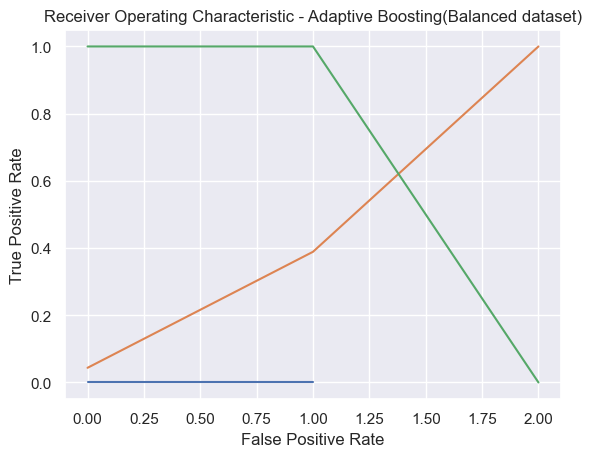

In [146]:
ada_bal.plot_roc("Adaptive Boosting(Balanced dataset)")

In [147]:
DT_bal = TrainImbModels(DecisionTreeClassifier(),x_train_bal, y_train_bal, x_test, y_test) #Decision tree
DT_bal.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       413
           1       0.21      0.33      0.26        18

    accuracy                           0.92       431
   macro avg       0.59      0.64      0.61       431
weighted avg       0.94      0.92      0.93       431



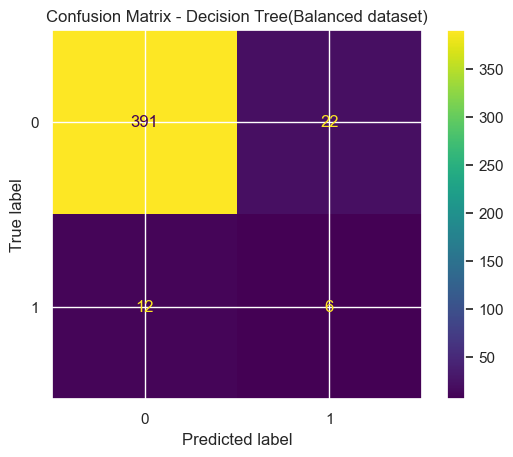

In [148]:
DT_bal.plot_cm("Decision Tree(Balanced dataset)")

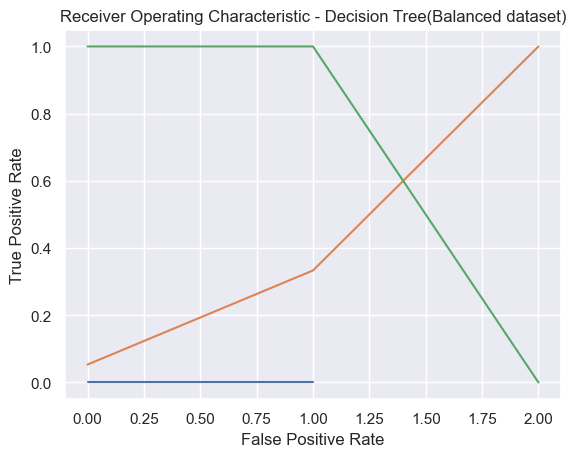

In [149]:
DT_bal.plot_roc("Decision Tree(Balanced dataset)")

In [150]:
naive_bayes_bal = TrainImbModels(BernoulliNB(),x_train_bal, y_train_bal, x_test, y_test) #Naive bayes
naive_bayes_bal.imb_model()

              precision    recall  f1-score   support

           0       0.96      0.75      0.84       413
           1       0.04      0.22      0.06        18

    accuracy                           0.73       431
   macro avg       0.50      0.49      0.45       431
weighted avg       0.92      0.73      0.81       431



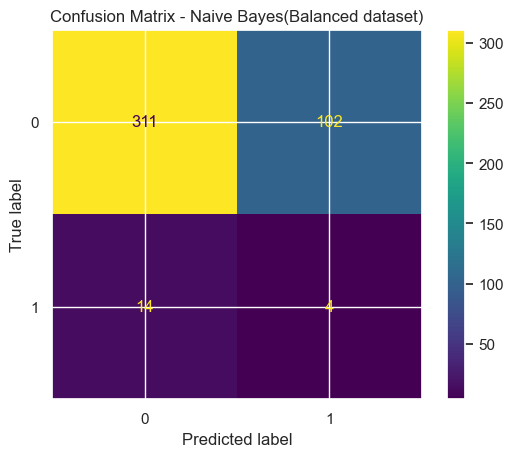

In [151]:
naive_bayes_bal.plot_cm("Naive Bayes(Balanced dataset)")

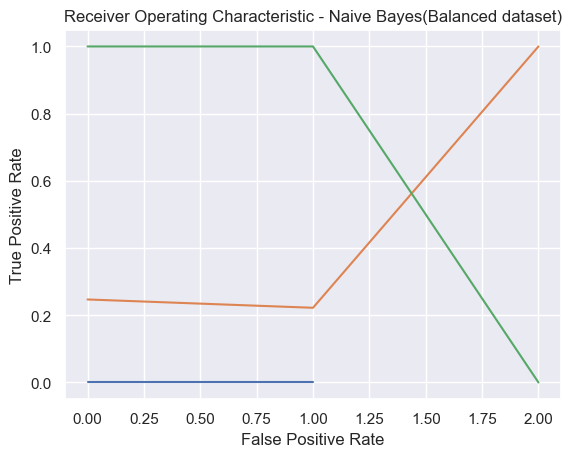

In [152]:
naive_bayes_bal.plot_roc("Naive Bayes(Balanced dataset)")

In [153]:
svm_bal = TrainImbModels(SVC(kernel = 'poly'),x_train_bal, y_train_bal, x_test, y_test) #Support vector machine
svm_bal.imb_model()

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       413
           1       0.19      0.50      0.27        18

    accuracy                           0.89       431
   macro avg       0.58      0.70      0.61       431
weighted avg       0.94      0.89      0.91       431



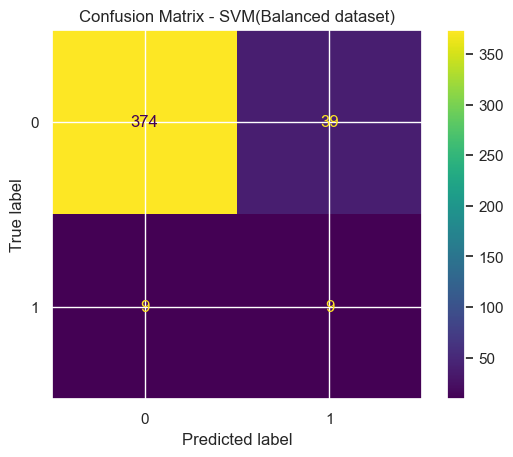

In [154]:
svm_bal.plot_cm("SVM(Balanced dataset)")

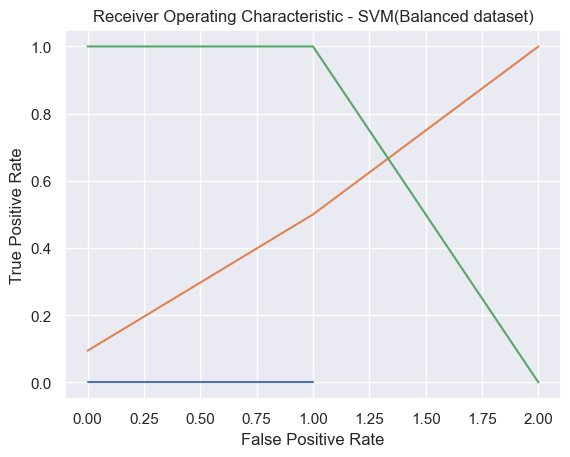

In [155]:
svm_bal.plot_roc("SVM(Balanced dataset)")

In [156]:
cat_bal = CatBoostClassifier(iterations=500, 
                           depth=6, 
                           learning_rate=0.1, 
                           loss_function='Logloss', 
                           verbose=True)
# Training the model
cat_bal.fit(x_train_bal, y_train_bal, cat_features=cat_features, eval_set=(x_test, y_test), plot=True)
# Making predictions
cat_bal_pred = cat_bal.predict(x_test)
print(classification_report(y_test,cat_bal_pred))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6103565	test: 0.6078862	best: 0.6078862 (0)	total: 15.6ms	remaining: 7.77s
1:	learn: 0.5426428	test: 0.5466098	best: 0.5466098 (1)	total: 30.7ms	remaining: 7.63s
2:	learn: 0.4787103	test: 0.4941897	best: 0.4941897 (2)	total: 45.3ms	remaining: 7.5s
3:	learn: 0.4240224	test: 0.4479787	best: 0.4479787 (3)	total: 59.6ms	remaining: 7.38s
4:	learn: 0.3908239	test: 0.4117551	best: 0.4117551 (4)	total: 73.8ms	remaining: 7.3s
5:	learn: 0.3438261	test: 0.3679624	best: 0.3679624 (5)	total: 88.7ms	remaining: 7.3s
6:	learn: 0.3157205	test: 0.3449064	best: 0.3449064 (6)	total: 104ms	remaining: 7.33s
7:	learn: 0.2949203	test: 0.3241156	best: 0.3241156 (7)	total: 118ms	remaining: 7.25s
8:	learn: 0.2711407	test: 0.3049253	best: 0.3049253 (8)	total: 132ms	remaining: 7.22s
9:	learn: 0.2493048	test: 0.2821863	best: 0.2821863 (9)	total: 146ms	remaining: 7.18s
10:	learn: 0.2342824	test: 0.2699261	best: 0.2699261 (10)	total: 161ms	remaining: 7.17s
11:	learn: 0.2200891	test: 0.2575197	best: 0.2575

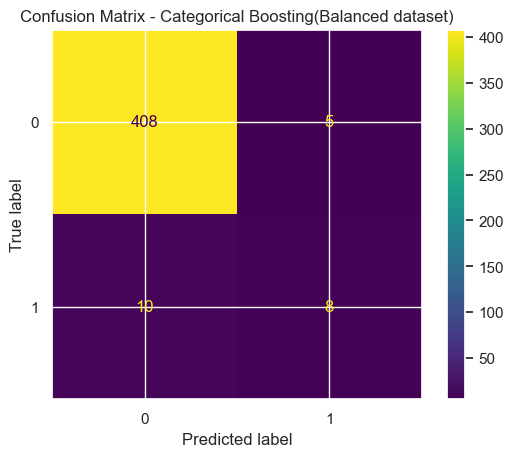

In [157]:
cm = confusion_matrix(y_test,cat_bal_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.title('Confusion Matrix - Categorical Boosting(Balanced dataset)')
plt.show()

Text(0.5, 1.0, 'Receiver Operating Characteristic - Catboost(Balanced dataset)')

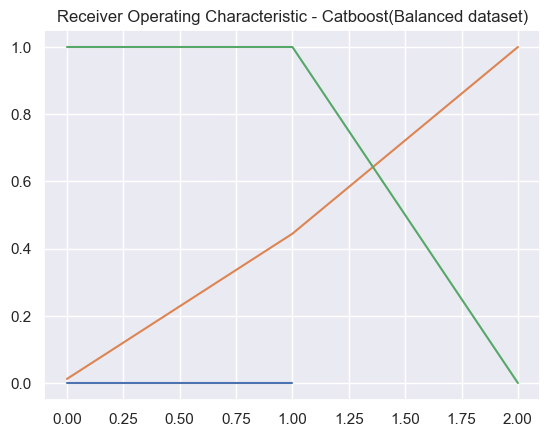

In [158]:
plt.plot(roc_curve(y_test,cat_bal_pred))
plt.title('Receiver Operating Characteristic - Catboost(Balanced dataset)')

In [160]:
import pickle
pickle.dump(ada_bal,open('model.pkl','wb'))